## 1. Predict 

In [1]:
# What will this print?
def f(n):
    if n == 0:
        return "boo!"
    else:
        print(n)
        return f(n-1)

print(f(5))

5
4
3
2
1
boo!


## 2. General Recursive Form 

Recursion technically means that some function calls itself. However, fundamentally, using recursion is more than that -- it is a powerful way to think about problem solving.

In recursion, we divide a function into two possible cases: a **base case**, which returns the result for a known small value, and a **recursive case**, which computes a result by calling the same function on a smaller value. In other words: we solve the problem by assuming it's already solved!



```
def recursiveFunction():
    if (this is the base case):
        do something non-recursive
    else:
        do something recursive
```



## 3. Basic Examples

We could write these with loops, but it's useful to practice basic recursion this way:

3.1 listSum

In [ ]:
# Problem: sum all of the numbers in a given list
def listSum(L):
    # Base Case: the list is empty, so the sum is 0
    if (len(L) == 0):
        return 0
    else:
        # Recursive Case: assume we already know the sum of the entire list
        # after the first element. Add that sum to the first element.
        return L[0] + listSum(L[1:])

print(listSum([2,3,5,7,11])) # what will this print?

3.2 rangeSum

In [ ]:
# Problem: sum all of the numbers from lo to hi, inclusive
def rangeSum(lo, hi):
    if (lo > hi):
        return 0
    else:
        return lo + rangeSum(lo+1, hi)

print(rangeSum(10,15)) # what will this print?

3.3 power

In [ ]:
# Problem: raise the number base to the given exponent
def power(base, expt):
    # assume expt is non-negative integer
    if (expt == 0):
        return 1
    else:
        return base * power(base, expt-1)

print(power(2,5)) # 32

## 4. Multiple Base/Recursive Cases

Sometimes, we need to include more than one base or recursive case when solving a problem

4.1 power

In [ ]:
def power(base, expt):
    # This version allows for negative exponents
    # It still assumes that expt is an integer, however.
    if (expt == 0):
        return 1
    elif (expt < 0): # new recursive case!
        return 1.0 / power(base, abs(expt)) ##easier way to convert. not dividing one by one
    else:
        return base * power(base, expt-1)

print(power(2,5)) # 32
print(power(2,-5)) # 1/32 = 0.03125

4.2 interleave

In [ ]:
def interleave(list1, list2):
    # Allow for different-length lists
    if (len(list1) == 0):
        return list2
    elif (len(list2) == 0): # new base case!
        return list1
    else:
        return [list1[0] , list2[0]] + interleave(list1[1:], list2[1:])

print(interleave([1,2],[3,4,5,6])) # what will we see here?

## 5. Practical Programming with Recursion

### 5.1 Infinite Recursion and Stack Overflow

Just as we can write infinite loops, we can also write infinite recursive functions, which result in stack overflow, producing a **RecursionError**.

In [ ]:
def sumToN(n):
    if n == 0:
        return 0
    else:
        return n + sumToN(n-1)

print(sumToN(3))  # 6 (works!)
print(sumToN(-3)) # RecursionError: maximum recursion depth exceeded...

### 5.2 Recursive Debugging

Debugging recursive code can be tricky because we not only have to know which function we are in, but which specific call to that function (since it calls itself repeatedly)! We can make it easier by keeping track of the recursion depth using an optional parameter, then adjusting the output based on that depth.

In [ ]:
#possible way for debugging
def rangeSum(lo, hi, depth=0):
    print("   " * depth + "rangeSum(" + str(lo) + ", " + str(hi) + ")")
    if depth == 10:
        input("Pause (press enter to continue)")
    if (lo > hi):
        result = 0
    else:
        result = lo + rangeSum(lo + 1, hi, depth + 1)
    print("   " * depth + "-->", result)
    return result

print(rangeSum(10, 30))

### 5.3 Wrapper Functions 

Sometimes we want to write a function with certain parameters, but it would be helpful to use different parameters in the recursive call. We can do this by writing a **wrapper function** around the core recursive function. The wrapper can set up the additional parameters on the way in, and it can also parse and perhaps modify the recursive result on the way out. The wrapper function itself is not recursive, but the function it calls is!

In [ ]:
# This time with a wrapper function that tracks the sum so far.
def rangeSum(lo, hi):
    return rangeSumHelper(lo, hi, 0)

def rangeSumHelper(lo, hi, sumSoFar):
    if (lo > hi):
        return sumSoFar
    else:
        return rangeSumHelper(lo+1, hi, lo+sumSoFar)

print(rangeSum(10,15)) # 75

### 5.4 Default Parameters (Optional)

5.4.1 Using default parameters in recursion

As we just saw, we can use wrapper functions to effectively add parameters that we need for recursion but which are not included in the top-level call. Another approach to do the same basic thing is to use default values. For example, here is one way to write rangeSum recursively using default parameters:

In [ ]:
# Now with a default value instead of a wrapper function
def rangeSum(lo, hi, sumSoFar=0):
    if (lo > hi):
        return sumSoFar
    else:
        return rangeSum(lo+1, hi, lo+sumSoFar)

print(rangeSum(10,15)) # 75

5.4.2 Do not use mutable default values (in recursion or elsewhere)

Python only creates default values once ever and reuses those values on each call. If you mutate those values, you will get unexpected results, where it works once properly, and then not after that. For example, here is a typical way to recursively reverse a list:

In [ ]:
# This is a typical, clean way without wrapper functions or default values:
def reverseList(L):
    if (L == [ ]):
        return [ ]
    else:
        return reverseList(L[1:]) + [L[0]]

print(reverseList([2,3,4])) # [4, 3, 2] (it works!)
print(reverseList([5,6,7])) # [7, 6, 5] (yup!)

And here it is again, using a default value in a similar way that we just did in rangeSum above:

In [ ]:
# Warning: This is BROKEN because it uses a mutable default value
def reverseList(L, reversedSoFar=[]):
    if (L == [ ]):
        return reversedSoFar
    else:
        reversedSoFar.insert(0, L[0])
        return reverseList(L[1:], reversedSoFar)

print(reverseList([2,3,4])) # [4, 3, 2] (it works the first time!)
print(reverseList([5,6,7])) # [7, 6, 5, 4, 3, 2] <-- OH NO!!!

5.4.3 Workarounds instead of mutable default values

We have several good choices instead of using mutable default values:

* Do not mutate the default value

In [ ]:
# Fix #1: just do not mutate it!
def reverseList(L, reversedSoFar=[]):
    if (L == [ ]):
        return reversedSoFar
    else:
        # reversedSoFar.insert(0, L[0])
        reversedSoFar = [L[0]] + reversedSoFar # this is nondestructive!
        return reverseList(L[1:], reversedSoFar)

print(reverseList([2,3,4])) # [4, 3, 2] (it works!)
print(reverseList([5,6,7])) # [7, 6, 5] (and it works again!)

* Use None as the default value

In [ ]:
# Fix #2: use None instead of [] and create a new list to start
def reverseList(L, reversedSoFar=None):
    if (reversedSoFar == None):
        reversedSoFar = [ ] # this creates a new list each time!
    if (L == [ ]):
        return reversedSoFar
    else:
        reversedSoFar.insert(0, L[0])
        return reverseList(L[1:], reversedSoFar)

print(reverseList([2,3,4])) # [4, 3, 2] (it works!)
print(reverseList([5,6,7])) # [7, 6, 5] (and it works again!)

* Use a wrapper function

In [ ]:
# Fix #3: use a wrapper function instead of a default value
def reverseList(L):
    return reverseListHelper(L, [ ])

def reverseListHelper(L, reversedSoFar):
    if (L == [ ]):
        return reversedSoFar
    else:
        reversedSoFar.insert(0, L[0])
        return reverseListHelper(L[1:], reversedSoFar)

print(reverseList([2,3,4])) # [4, 3, 2] (it works!)
print(reverseList([5,6,7])) # [7, 6, 5] (and this also works again!)



*   Use a different approach without default values



In each example above, we started with a recursive function that did not use default values. It can be easier and cleaner to write your functions that way, when possible. And when it's not clear how to do that, then use wrapper functions or at least use None as a default value for mutable types.

### 5.5 Multiple Recursive Calls

Recursion is perhaps most powerful when we make **multiple recursive calls** in the recursive case. This often lets us solve problems that we cannot easily solve with loops. You can think of this approach as **divide and conquer**. In order to solve a problem, we break it into smaller parts, solve each of those, then combine the solutions to get the final answer.

* listSum

In [ ]:
# Technically we don't need multiple recursive calls here, but it's a nice simple example.
# Sum the list by splitting it in half, then summing each half.
def listSum(L):
    if (len(L) == 0):
        return 0
    elif (len(L) == 1):
        return L[0]
    else:
        mid = len(L)//2
        return listSum(L[:mid]) + listSum(L[mid:])

print(listSum([2,3,5,7,11])) # 28

* fibonacci 

In [ ]:
# In the Fibonacci sequence, each element is the sum of the two
# elements before it. This translates nicely into recursive code!
def fib(n):
    if (n < 2):
        return 1 # note: fib(0) and fib(1) are both 1
    else:
        return fib(n-1) + fib(n-2)

print([fib(n) for n in range(15)])

* towersOfHanoi

A. First attempt (without Python):



```
# This is the plan to solve Towers of Hanoi (based on magic!)
magically move(n-1, source, temp, target)
          move(  1, source, target, temp)
magically move(n-1, temp, target, source)
```




B. Turn into Python (The "magic" is recursion!):

In [ ]:
def move(n, source, target, temp):
    move(n-1, source, temp, target)
    move(  1, source, target, temp)
    move(n-1, temp, target, source)

move(2, 0, 1, 2) # Does not work -- infinite recursion

C. Once again, with a base case:

In [ ]:
def move(n, source, target, temp):
    if (n == 1):
        print((source, target), end="")
    else:
        move(n-1, source, temp, target)
        move(  1, source, target, temp)
        move(n-1, temp, target, source)

move(2, 0, 1, 2)

D. Once more, with a nice wrapper:


In [ ]:
def move(n, source, target, temp):
    if (n == 1):
        print((source, target), end="")
    else:
        move(n-1, source, temp, target)
        move(  1, source, target, temp)
        move(n-1, temp, target, source)

def hanoi(n):
    print("Solving Towers of Hanoi with n =", n)
    move(n, 0, 1, 2)
    print()

hanoi(4)

E. And again, printing call stack and recursion depth:

In [ ]:
def move(n, source, target, temp, depth=0):
    print((" " * 3 * depth), "move", n,
          "from", source, "to", target, "via", temp)
    if (n == 1):
        print((" " * 3 * depth), (source, target))
    else:
        move(n-1, source, temp, target, depth+1)
        move(  1, source, target, temp, depth+1)
        move(n-1, temp, target, source, depth+1)

def hanoi(n):
    print("Solving Towers of Hanoi with n =", n)
    move(n, 0, 1, 2)
    print()
hanoi(4)

F. Iterative Towers of Hanoi (just to see it's possible):

In [ ]:
def iterativeHanoi(n):
    def f(k): return (k%3) if (n%2==0) else (-k%3)
    return [(f(move & (move-1)),
             f((move|(move-1))+1)) for move in range(1,1 << n)]

def recursiveHanoi(n, source=0, target=1, temp=2):
    if (n == 1):
        return [(source, target)]
    else:
        return (recursiveHanoi(n-1, source, temp, target) +
                recursiveHanoi(  1, source, target, temp) +
                recursiveHanoi(n-1, temp, target, source))

def compareIterativeAndRecursiveHanoi():
    for n in range(1,10):
        assert(iterativeHanoi(n) == recursiveHanoi(n))
    print("iterative and recursive solutions match exactly in all tests!")
    
compareIterativeAndRecursiveHanoi()

## 5. Search

In [ ]:
def recursiveLinearSearch(lst, target): 
    if lst == [ ]:
        return False
    elif lst[0] == target:
        return True 
    else:
        return recursiveLinearSearch(lst[1:], target)

print(recursiveLinearSearch(["dog", "cat", "rabbit", "mouse"], "rabbit"))  
print(recursiveLinearSearch(["dog", "cat", "rabbit", "mouse"], "horse"))


In [ ]:
def binarySearch(lst, target): 
    if lst == [ ]:
        return False  
    else:
        midIndex = len(lst) // 2
        if lst[midIndex] == target:
            return True
        elif target < lst[midIndex]:
            return binarySearch(lst[:midIndex],target)
        else: # lst[midIndex] < target
            return binarySearch(lst[midIndex+1:], target)


In [ ]:

print(binarySearch([2, 7, 11, 18, 19, 32, 45, 63, 84, 95, 97], 95))

print(recursiveLinearSearch([2, 7, 11, 18, 19, 32, 45, 63, 84, 95, 97], 95))

## 6. mergeSort 

In [ ]:
def merge(A, B):
    # beautiful, but impractical for large N
    if ((len(A) == 0) or (len(B) == 0)):
        return A+B
    else:
        if (A[0] < B[0]):
            return [A[0]] + merge(A[1:], B)
        else:
            return [B[0]] + merge(A, B[1:])

# def merge(A, B):
#     # iterative (ugh) and destructive (double ugh), but practical...
#     C = [ ]
#     i = j = 0
#     while ((i < len(A)) or (j < len(B))):
#         if ((j == len(B)) or ((i < len(A)) and (A[i] <= B[j]))):
#             C.append(A[i])
#             i += 1
#         else:
#             C.append(B[j])
#             j += 1
#     return C

def mergeSort(L):
    if (len(L) < 2):
        return L
    else:
        # No need for complicated loops- just merge sort each half, then merge!
        mid = len(L)//2
        left = mergeSort(L[:mid])
        right = mergeSort(L[mid:])
        return merge(left, right)

print(mergeSort([1,5,3,4,1,0,9,8]))

*quickSort (optional) 

In [ ]:
# In Quick Sort, select an element to pivot around, organize all elements to
# the left and right of the pivot, then Quick Sort each side.
def quickSort(L):
    if (len(L) < 2):
        return L
    else:
        first = L[0]  # pivot
        rest = L[1:]
        lo = [x for x in rest if x < first]
        hi = [x for x in rest if x >= first]
        return quickSort(lo) + [first] + quickSort(hi)

print(quickSort([1,5,3,4,2,0]))

### 6.1 Hazard: *Extra Recursive Calls

The problem:

In [ ]:
def f(L):
    if L == [ ]:
        return 0
    else:
        if (f(L[1:]) > 10):
            return 1 + f(L[1:])
        else:
            return 2 + f(L[1:])

print(f(list(range(10)))) # prints 16

# However... uncomment the next line and run it:

# print(f(list(range(30)))) # super, super slow! <-- This shows the problem

The reason:

What's going on? Well, in our recursive case, we call f(L[1:]) twice. So f(L) calls f(L[1:]) twice, but f(L[1:]) calls f(L[2:]) twice on each call so 4 times total, and that means f(L[3:]) will be called 2\*\*3 or 8 times. Thus, if L is of length N, then the base case will be called 2\*\*N times. And that's exponential, which runs very slowly.

The fix:

In [ ]:
def f(L):
    if L == [ ]:
        return 0
    else:
        rest = f(L[1:])     # <-- this is the fix (recurse only once)
        if (rest > 10):
            return 1 + rest
        else:
            return 2 + rest

print(f(list(range(10))))  # 16 (whew)
print(f(list(range(100)))) # 106, zippy quick!!!  Problem solved!

## 7. Combining Iteration and Recursion (optional)

We sometimes need to combine iteration and recursion while problem solving.

7.1 powerset, or combination (optional)

In [ ]:
# Problem: given a list a, return a list with all the possible subsets of a.

def powerset(a):
    # Base case: the only possible subset of an empty list is the empty list.
    if (len(a) == 0):
        return [ [] ]
    else:
        # Recursive Case: remove the first element, then find all subsets of the
        # remaining list. Then for each subset, use two versions of that subset:
        # one without the first element, and another one with it.

        partialSubsets = powerset(a[1:])
        allSubsets = [ ]
        for subset in partialSubsets:
            #choose a[0], or not to choose a[0]
            allSubsets.append(subset)
            allSubsets.append([a[0]] + subset)
        return allSubsets

print(powerset([1,2,3]))

7.2 permutations (optional)

In [ ]:
# Problem: given a list a, find all possible permutations (orderings) of the
# elements of a

def permutations(a):
    # Base Case: the only permutation of an empty list is the empty list
    if (len(a) == 0):
        return [ [] ]
    else:
        # Recursive Case: remove the first element, then find all possible
        # permutations of the remaining elements. For each permutation,
        # insert a into every possible position in that permutation.

        partialPermutations = permutations(a[1:])
        allPerms = [ ]
        for perm in partialPermutations:
            for i in range(len(perm) + 1):
                allPerms.append(perm[:i] + [ a[0] ] + perm[i:])
        return allPerms

print(permutations([1,2,3]))

In [1]:
# Alternative Approach: choose each element as the starting element of the
# permutation, then find all possible permutations of the rest.

def permutations(a):
    if (len(a) == 0):
        return [ [] ]
    else:
        allPerms = [ ]
        for i in range(len(a)):
            partialPermutations = permutations(a[:i] + a[i+1:])
            for perm in partialPermutations:
                allPerms.append([ a[i] ] + perm)
        return allPerms

print(permutations([1,2,3]))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


8. Iteration vs. Recursion

8.1 factorial

Iterative Solution

In [ ]:
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

print(factorial(5))

Recursive Solution

In [ ]:
def factorial(n):
    if (n < 2):
        return 1
    else:
        return n * factorial(n - 1)

print(factorial(5))

8.2 reverse

Iterative Solution

In [ ]:
def reverse(s):
    reverse = ""
    for ch in s:
        reverse = ch + reverse
    return reverse


print(reverse("abcd"))

Recursive Solution

In [ ]:
def reverse(s):
    if (len(s) < 2):
        return s
    else:
        mid = len(s)//2
        return reverse(s[mid:]) + reverse(s[:mid])

print(reverse("abcd"))

digitSum

Iterative Solution

In [ ]:
def digitSum(n):
    if n < 0:
        n = abs(n)
    result = 0
    while n > 0:
        result += n % 10
        n = n // 10
    return result

print(digitSum(-12345))

Recursive Solution

In [ ]:
def digitSum(n):
    if (n < 0):
        return digitSum(abs(n))
    elif (n < 10):
        return n
    else:
        return (n % 10) + digitSum(n // 10)


print(digitSum(-12345))

gcd (optional)

In [ ]:
def gcd(x, y):
    while (y > 0):
        (x, y) = (y, x % y)
    return x


print(gcd(500, 420)) # 20

Recursive Solution

In [ ]:
def gcd(x, y):
    if (y == 0):
        return x
    else:
        return gcd(y, x % y)

print(gcd(500, 420)) # 20

exercise: binary to decimal

In [7]:
def bintodec(n):
    #print(n)
    if n == '0':
        return 0
    if n == '1':
        return 1
    return 2 * bintodec(n[0:-1]) + bintodec(n[-1])

In general, recursion and iteration have the following properties:

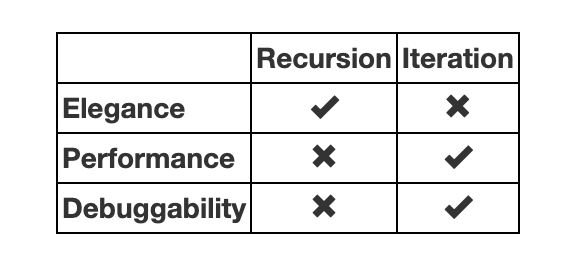